<a href="https://colab.research.google.com/github/Pagido/projet/blob/main/coup_feu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pension selon les blessures par balle

In [ ]:
! pip install mca

  Preparing metadata (setup.py) ... done
  Created wheel for mca: filename=mca-1.0.3-py2.py3-none-any.whl size=6009 sha256=e4fb84a9aa84ab08f12db7047b0f8a9f9003d988585cf01a258200241f40ecb7
  Stored in directory: /root/.cache/pip/wheels/41/3c/28/32383be9777008d3318b6e787b89273ca4a6c6c915ce9bd1f3
Successfully built mca


In [ ]:
import pandas as pd
import os #module pour connaitre et modifier le répertoire courant où Python cherche les modules
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
!pip install fanalysis
from fanalysis.ca import CA as fCA
from fanalysis.mca import MCA as fMCA
from mca import MCA
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 2.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/My Drive/Data/blesse(e)_feu.xlsx"

data = pd.read_excel("/content/drive/My Drive/Data/blesse(e)_feu.xlsx", index_col = 0)
data.head()

Mounted at /content/drive


,Nature des faits,Nature des faits (normalisé),profession,decision
id,,,,
57,coup de feu à un membre(inf/sup),blessé(e),Professions intellectuelles supérieures,500 fr ≤ x ≤ 900 fr
68,coup de feu à la poitrine,blessé(e),Entrepreneurs commerciaux,500 fr ≤ x ≤ 900 fr
86,coup de feu à un membre(inf/sup),blessé(e),Entrepreneurs commerciaux,< 500 fr
91,coup de feu à un membre(inf/sup),blessé(e),employé,500 fr ≤ x ≤ 900 fr
104,coup de feu à l'épaule,blessé(e),Personnels des armées,500 fr ≤ x ≤ 900 fr


In [ ]:
data['Nature des faits'].value_counts()

Profession (1789)
garde française             329
Personnels des armées        52
garde nationale              43
volontaire de la Bazoche     24
Name: count, dtype: int64

In [ ]:
data['decision'].value_counts()

Profession (1830)
Personnels des armées                      112
artisan                                     81
employé                                     26
professions intellectuelles supérieures     25
ouvrier                                     23
fonctionnaire                               20
métiers agricoles                           18
Entrepreneurs commerciaux                   13
Name: count, dtype: int64

In [ ]:
data.shape

(3780, 20)

In [ ]:
data.columns

Index(['Année', 'Nom', 'Prénoms', 'Sexe', 'Etat civil', 'Date de naissance',
       'Date de naissance (normalisé)', 'Lieu de naissance',
       'Nature de la demande', 'Profession', 'Domicile (adresse)',
       'Domicile (commune)', 'Lieu des faits', 'Nature des faits',
       'Nature des faits (normalisé)', 'Date de mort',
       'Date de mort normalisée', 'Décision de la Commission',
       'Date de la décision', 'Remarques'],
      dtype='object')

In [ ]:
#df.dtypes
data.describe()

,Profession,Remarques
count,465,320
unique,7,9
top,garde française,Personnels des armées
freq,329,112


Plusieurs questions peuvent se poser. Par exemple le nombre de lieux où ont dormi les personnes sans logement au cours des 8 derniers jours dépend-il de l'âge ?  La situation familiale a-t-elle un impact sur le lieu où les personnes sans logement ont dormi la nuit précédant l'enquête ?

 ## Partie 1 : le nombre de lieux où ont dormi les personnes sans logement au cours des 8 derniers jours dépend-il de l'âge ?
Tableau de contingence croisant ces deux variables après les avoir recodées si besoin :

In [ ]:
contingence = pd.crosstab(data['Nature des faits'], data['decision'],  margins = True)
contingence

decision,1000 fr ≤ x ≤ 1500 fr,500 fr ≤ x ≤ 900 fr,< 500 fr,All
Nature des faits,,,,
amputation,5,18,1,24
contusion,12,2,4,18
fracture,7,1,2,10
All,24,21,7,52


In [ ]:
data.Dormi_8dernierjrs[data.Dormi_8dernierjrs=='Plusieurs_lieux']='Plusieurs lieux'
contingence = pd.crosstab(data['A'], df['Dormi_8dernierjrs'], margins = True)
contingence

Dormi_8dernierjrs,Non réponse,Plusieurs lieux,Un seul lieu,All
Age,,,,
- de 30 ans,8,79,118,205
30 à 39 ans,6,57,103,166
40 à 49 ans,6,41,67,114
50 ans et +,3,26,55,84
Non réponse,5,12,16,33
All,28,215,359,602


In [ ]:
#Une autre façon de construire le tableau de contingence
Y = 'Dormi_8dernierjrs'
X = 'Age'
contingence_bis = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True)
contingence_bis

Dormi_8dernierjrs,Non réponse,Plusieurs lieux,Un seul lieu,All
Age,,,,
- de 30 ans,8,79,118,205
30 à 39 ans,6,57,103,166
40 à 49 ans,6,41,67,114
50 ans et +,3,26,55,84
Non réponse,5,12,16,33
All,28,215,359,602


Représentation graphique de l'information contenue dans le tableau de contigence :

Tableau de contingence avec les fréquences et graphiques avec les fréquences :

In [ ]:
contingence = pd.crosstab(data['Nature des faits'], data['decision'], margins = True, normalize=True)
contingence

Profession (1830),Entrepreneurs commerciaux,Personnels des armées,artisan,employé,fonctionnaire,métiers agricoles,ouvrier,professions intellectuelles supérieures,All
Profession (1789),,,,,,,,,
Personnels des armées,0.000000,0.020305,0.025381,0.025381,0.015228,0.030457,0.005076,0.005076,0.126904
garde française,0.025381,0.263959,0.121827,0.050761,0.055838,0.055838,0.060914,0.055838,0.690355
garde nationale,0.010152,0.020305,0.055838,0.005076,0.015228,0.005076,0.005076,0.005076,0.121827
volontaire de la Bazoche,0.005076,0.010152,0.000000,0.000000,0.005076,0.000000,0.000000,0.040609,0.060914
All,0.040609,0.314721,0.203046,0.081218,0.091371,0.091371,0.071066,0.106599,1.000000


La 1re valeur est le Khi² obs, la 2e la probabilité critique, la 3e le degré de liberte et dans le tableau les effectifs théoriques

On en déduit que ...

Comme la probabilité critique vaut 0,18 on ne peut pas rejeter l'hypothèse d'indépendance (on l'admet) : il n'y pas de lien entre l'âge et le nb de lieux où les personnes enquêtées ont dormi pendant les 8 derniers jours.

 ## Partie 2 : la situation familiale a-t-elle un impact sur le lieu où les personnes sans logement ont dormi la nuit précédant l'enquête ?
Construisez le tableau de contingence croisant ces deux variables après les avoir recodées si besoin et proposez en une représentation graphique.

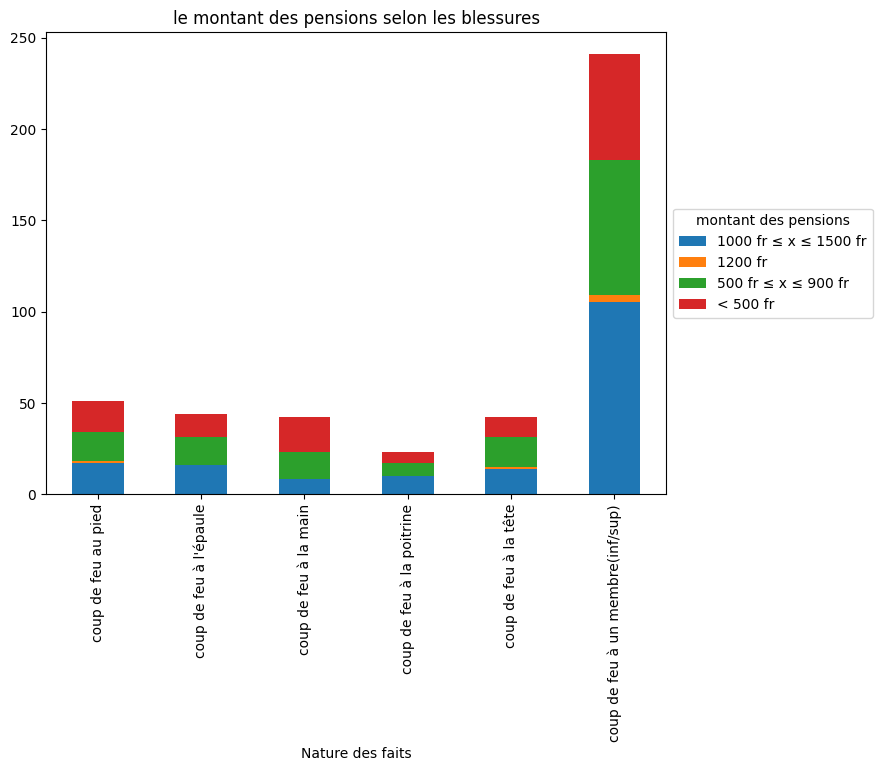

In [ ]:
# Calculer la table de contingence
contingence = pd.crosstab(data['Nature des faits'], data['decision'], margins=False)

# Tracer le graphique à barres empilées
ax = contingence.plot.bar(stacked=True, figsize=(8, 6), title="le montant des pensions selon les blessures")

# Placer la légende à côté du graphique
plt.legend(title='montant des pensions', loc='center left', bbox_to_anchor=(1, 0.5))

# Afficher le graphique
plt.show()

#### Répondez à la question avec un test statistique

In [ ]:
contingence = pd.crosstab(data['Nature des faits'], data['decision'],  margins = False)
stats.chi2_contingency(contingence) #Test d'indépendance du Khi² dans la librairie scipy
#Khi2obs, pvalue, ddl, effectifs_theorique =stats.chi2_contingency(contingence)

Chi2ContingencyResult(statistic=22.317526455026456, pvalue=0.0001732607167938212, dof=4, expected_freq=array([[11.07692308,  9.69230769,  3.23076923],
       [ 8.30769231,  7.26923077,  2.42307692],
       [ 4.61538462,  4.03846154,  1.34615385]]))